# News Mood

In [1]:
# Dependencies
import tweepy
import json
import time
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns 
import numpy             as np
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Twitter API Keys
consumer_key        = consumer_key
consumer_secret     = consumer_secret
access_token        = access_token
access_token_secret = access_token_secret

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api  = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
columns = ['Media', 'Tweet Index', 'TimeStamp', 'Compound', 'Positive', 'Neutral', 'Negative']

media_analysis_df = pd.DataFrame(columns=columns)
media_analysis_df.head()

,Media,Tweet Index,TimeStamp,Compound,Positive,Neutral,Negative


## API Call to Twitter

In [6]:
def parse_tweets(media, public_tweets):
    count = media_analysis_df.shape[0]
    
    # Loop through all tweets
    for index, tweet in enumerate(public_tweets):
        media_analysis_df.set_value(count, 'Media',       media)
        media_analysis_df.set_value(count, 'Tweet Index', index)
        media_analysis_df.set_value(count, 'TimeStamp',   tweet['created_at'])
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos      = analyzer.polarity_scores(tweet["text"])["pos"]
        neu      = analyzer.polarity_scores(tweet["text"])["neu"]
        neg      = analyzer.polarity_scores(tweet["text"])["neg"]

        # Add each value to the appropriate array
        media_analysis_df.set_value(count, 'Compound', compound)
        media_analysis_df.set_value(count, 'Positive', pos)
        media_analysis_df.set_value(count, 'Neutral' , neu)
        media_analysis_df.set_value(count, 'Negative', neg)
        
        count += 1

In [7]:
# Target Search Term
tweet_limit   = 100
media_handles = {'BBC':            '@BBC',
                 'CBS':            '@CBS',
                 'CNN':            '@CNN',
                 'Fox':            '@FoxNews',
                 'New York Times': '@nytimes'}

for media, handle in media_handles.items():
    
    public_tweets = api.search(handle, count=tweet_limit, result_type='recent')
    parse_tweets(media, public_tweets['statuses'])

In [8]:
# media_analysis_df.to_csv('media_analysis.csv', index=False)
date = time.strftime("%m/%d/%Y")

if True:
    media_analysis_df = pd.read_csv('media_analysis.csv')
    date              = '04/08/2018'
    
media_analysis_df['Media'].value_counts()

BBC               100
CNN               100
Fox               100
New York Times    100
CBS               100
Name: Media, dtype: int64

In [9]:
media_analysis_df.head()

,Media,Tweet Index,TimeStamp,Compound,Positive,Neutral,Negative
0,BBC,0,Sun Apr 08 20:51:31 +0000 2018,0.0000,0.000,1.000,0.000
1,BBC,1,Sun Apr 08 20:51:26 +0000 2018,0.0000,0.000,1.000,0.000
2,BBC,2,Sun Apr 08 20:51:15 +0000 2018,0.0000,0.000,1.000,0.000
3,BBC,3,Sun Apr 08 20:51:12 +0000 2018,0.2263,0.115,0.820,0.066
4,BBC,4,Sun Apr 08 20:51:05 +0000 2018,0.4199,0.134,0.793,0.072


## Mood Plots

In [10]:
# The colors of each categorical value
colors = ['lightblue', 'green', 'red', 'blue', 'yellow']

sns.set() # sets seaborn grid

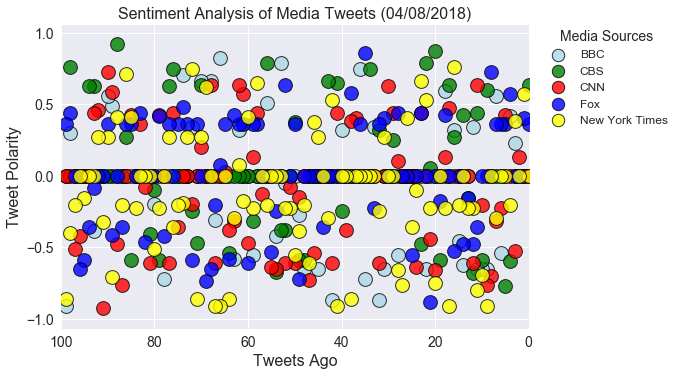

In [11]:
sns.lmplot(x='Tweet Index', y='Compound', hue='Media', data=media_analysis_df, fit_reg=False, legend=False, aspect=1.5,
           scatter_kws={'s': 190, 'alpha':.8, 'linewidth':1, 'edgecolors':'black'}, palette=colors)

plt.legend(fontsize='12', title='Media Sources', markerscale=.9, loc="upper right", bbox_to_anchor=(1.32,1.02)).get_title().set_fontsize(14) 
plt.title(f"Sentiment Analysis of Media Tweets ({date})", fontsize=16)
plt.ylabel("Tweet Polarity", fontsize=16)
plt.yticks(np.arange(-1, 1.5, step=0.5))
plt.xlabel("Tweets Ago", fontsize=16)
plt.tick_params(labelsize=14)
plt.xlim(100, 0)

plt.show()

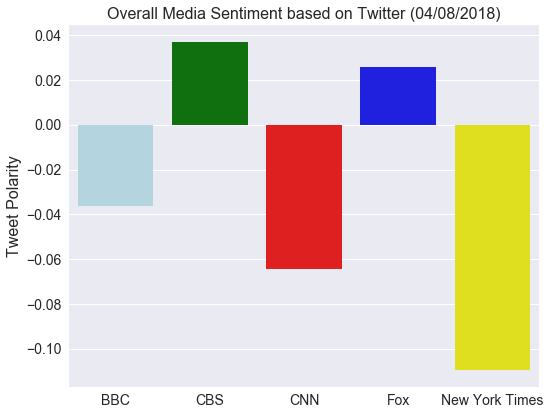

In [12]:
sns.factorplot(x='Media', y='Compound', data=media_analysis_df, kind="bar", size=5.8, aspect=1.3 ,ci=None, palette=colors)
plt.title(f"Overall Media Sentiment based on Twitter ({date})", fontsize=16)
plt.ylabel("Tweet Polarity", fontsize=16)
plt.tick_params(labelsize=14)
plt.xlabel('')

plt.show()